# Unsupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [6]:
# importing the data from csv file to dataframe and stored in diabetes variable 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
wholesale_df = pd.read_csv('/Users/inderpalsura/Desktop/Lighthouse/WholeSale_data-analysis/Wholesale_Data.csv')
wholesale_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
# information about the dataset
wholesale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [8]:
# to know more about the dataset
# As the minimum value is 0 of all columns so I'll change with NAN
wholesale_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
# to know about the dataset with transpose - T
wholesale_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [10]:
# Check for missing values
wholesale_df.isnull().head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [11]:
# Check for missing values
wholesale_df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [12]:
# checking for duplicate value in the dataset
wholesale_df.duplicated().any()

False

In [13]:
# Handle missing values (you can choose an appropriate strategy)
# For example, drop rows with missing values
wholesale_df.dropna(inplace=True)
wholesale_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


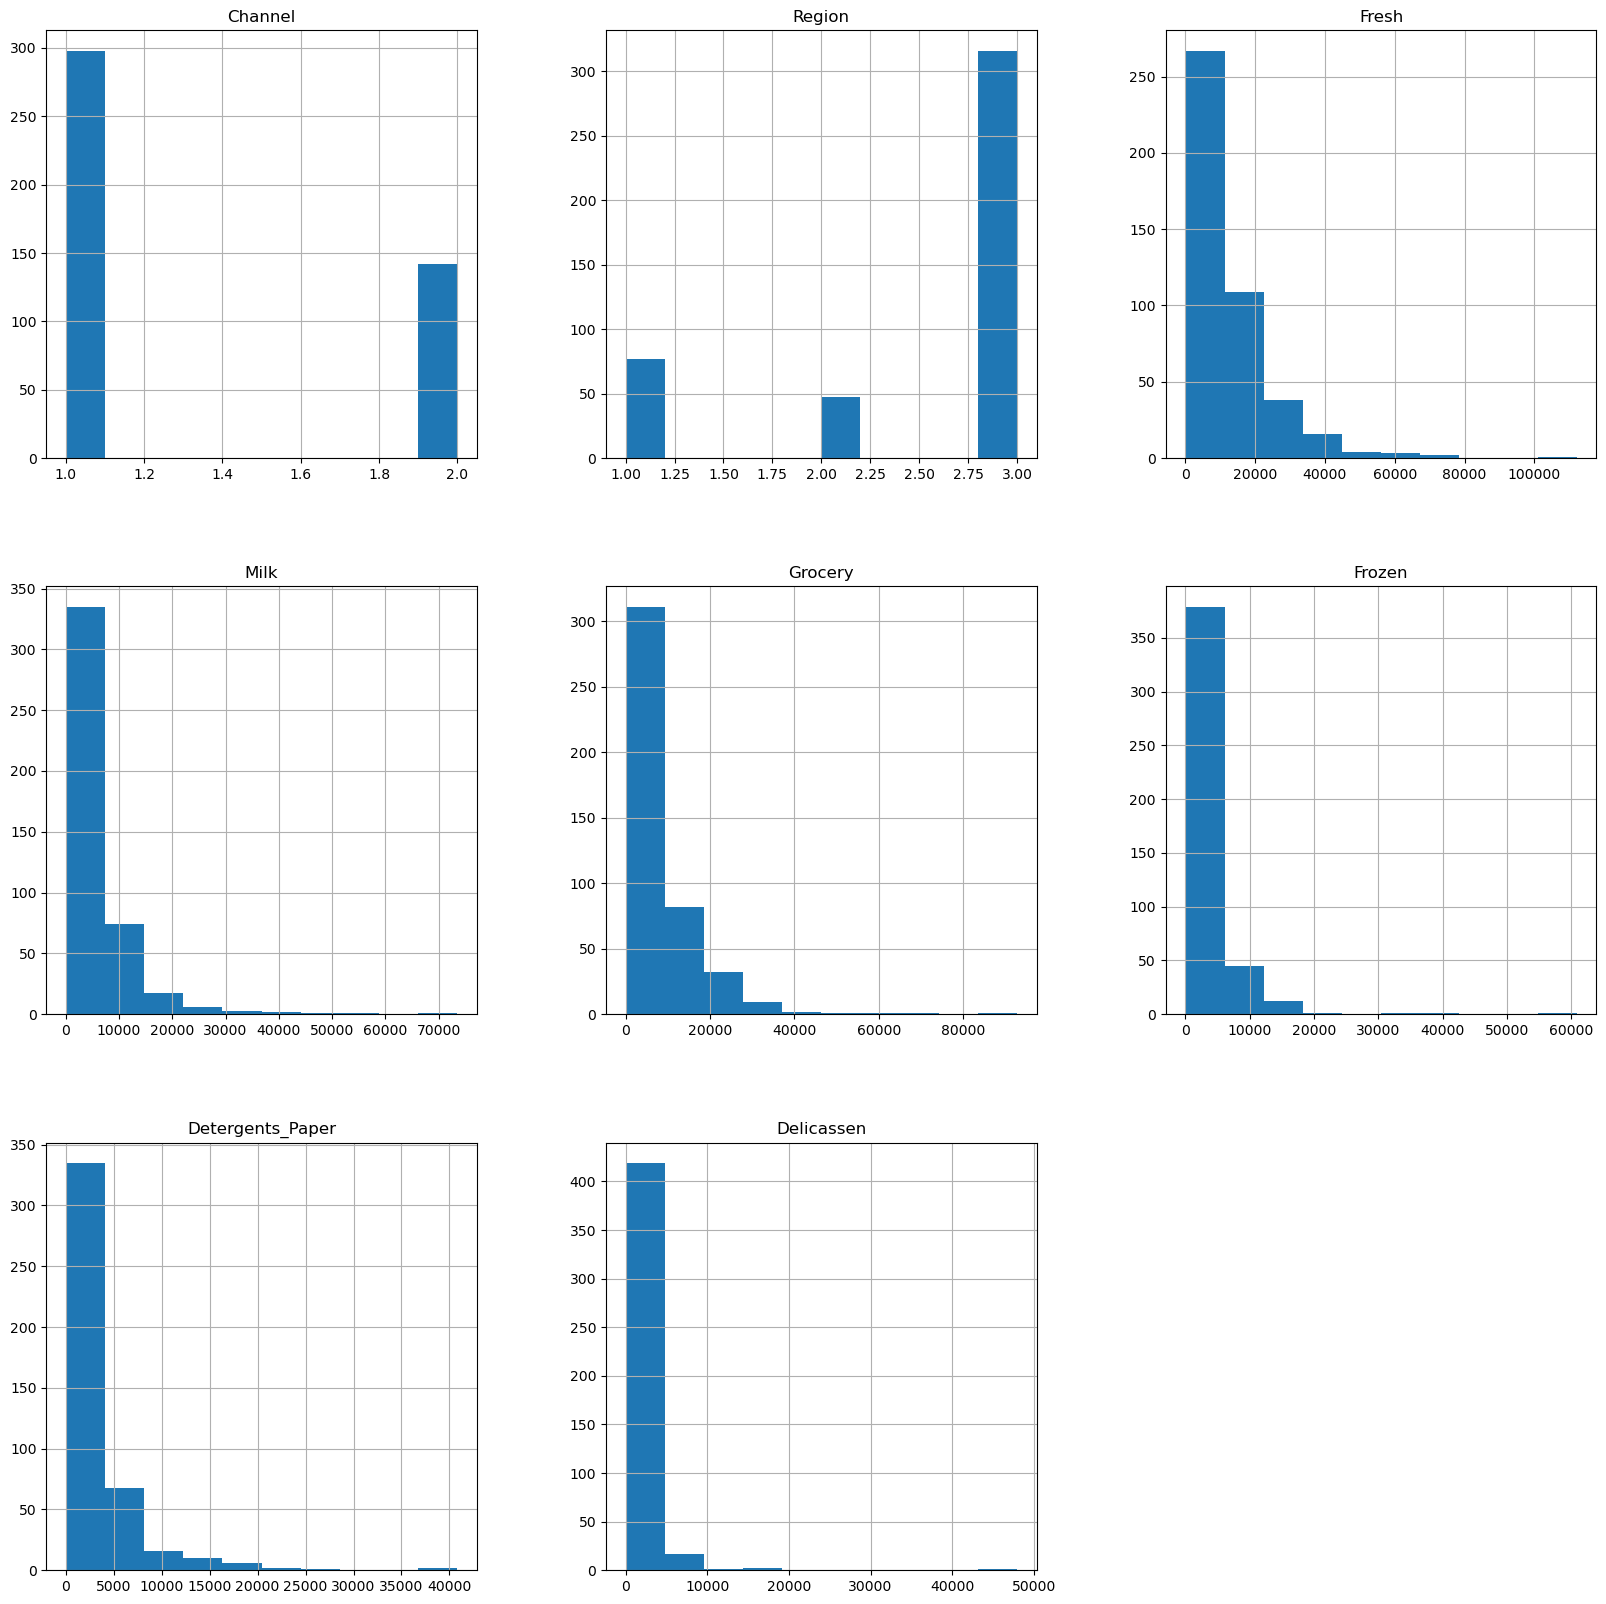

In [14]:
# showing the distribution of values within that specific column in histogram in order to understand the identify data patterns, potential issues, and decide on data preprocessing steps, such as handling outliers or normalizing features
p = wholesale_df.hist(figsize = (20,20))

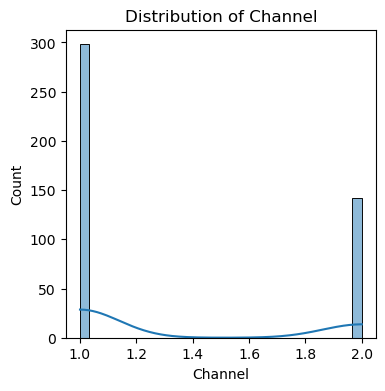

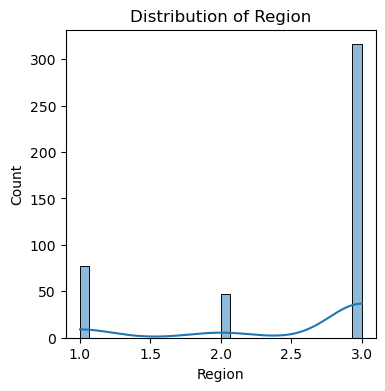

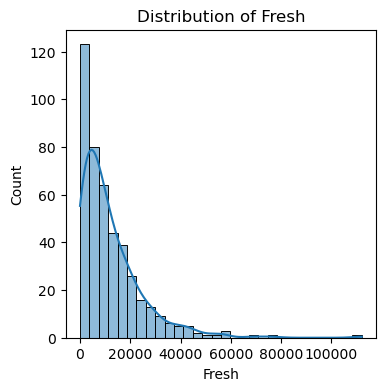

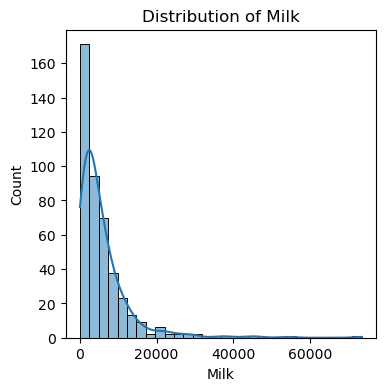

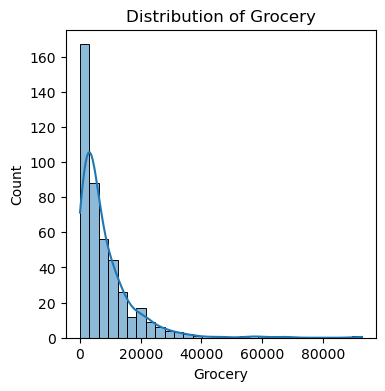

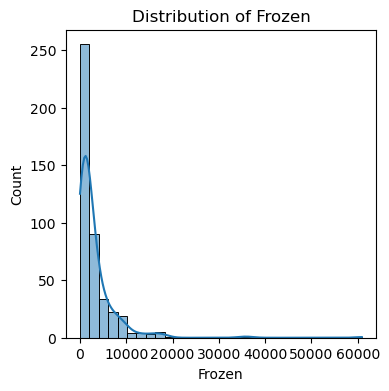

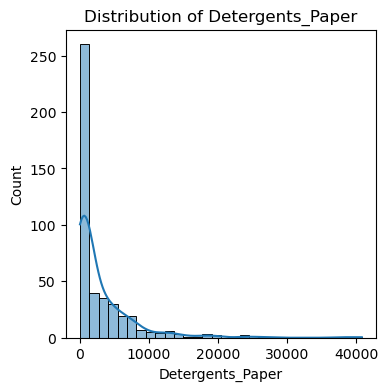

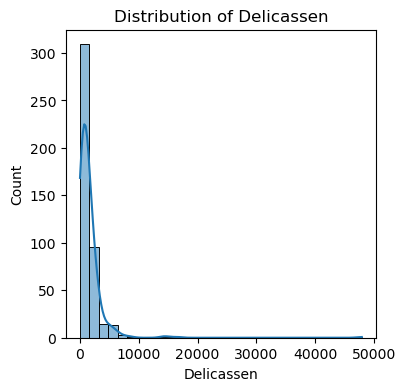

In [15]:
# Distribution plots for each feature
for column in wholesale_df.columns:
    plt.figure(figsize=(4, 4))
    sns.histplot(wholesale_df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

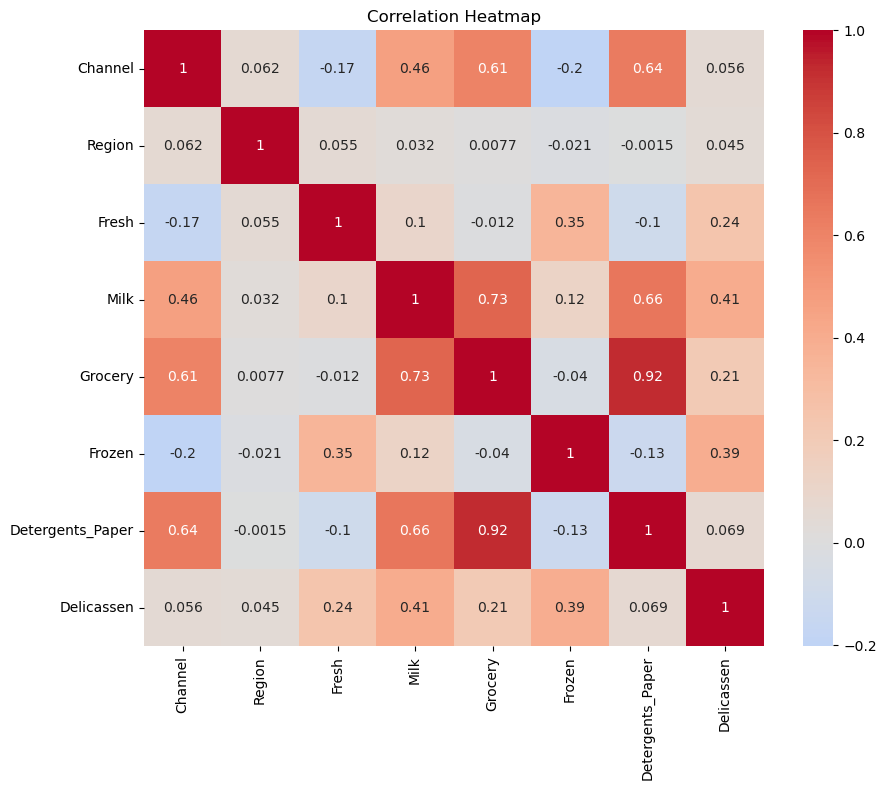

In [16]:
# Heatmap for correlation between variables
plt.figure(figsize=(10, 8))
sns.heatmap(wholesale_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

Remarks on the above analysis:
From the provided descriptive statistics, here are some observations:

No Missing Values: There are 440 entries in each column, and no missing values in the data, which is good.

No Duplicates: The data doesn't have any duplicate rows.

Channels and Regions: These seem to be categorical variables, with 'Channel' having two categories (1 and 2) and 'Region' three categories (1, 2, 3).

Different Scales: The means and standard deviations for each feature vary significantly, indicating that the data spans several orders of magnitude. This could potentially impact certain machine learning models that are sensitive to the scale of the input features ). You might need to consider feature scaling.

Outliers: Looking at the difference between the 75% percentile (Q3) and the maximum values of each feature, we see significant jumps. For instance, in the 'Fresh' feature, the 75% percentile is at 16933.75, but the maximum value is 112151. This suggests the presence of outliers that could potentially skew your model.

Right Skewness: Features such as 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', and 'Delicassen' show a right skew (mean > median). This could impact the performance of some machine learning algorithms.

Feature Correlation: It's also essential to examine the correlation matrix (not provided in your output but could be generated during EDA). Correlation between features can inform us about potential multi-collinearity, and correlation of features with the target variable can provide an indication of important features.

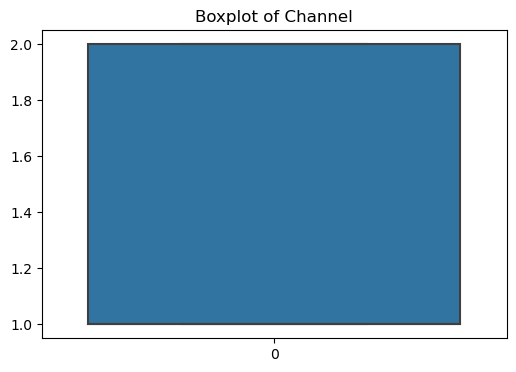

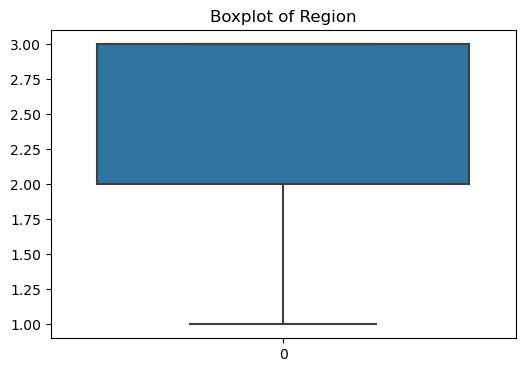

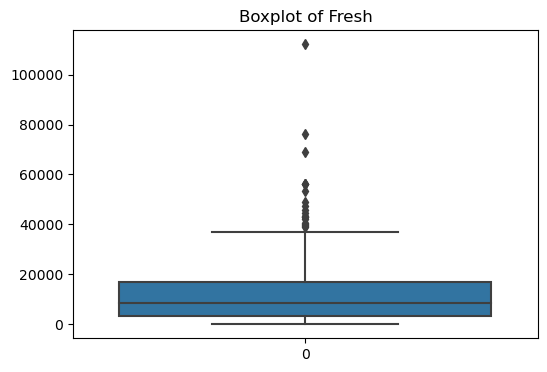

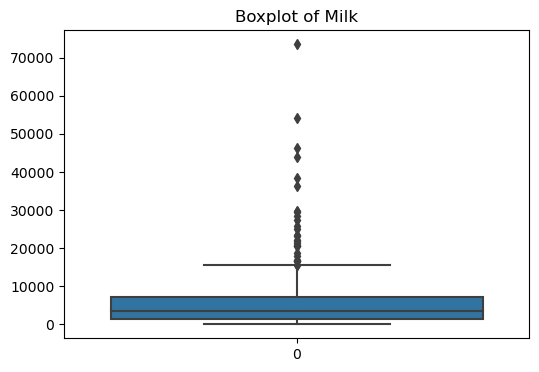

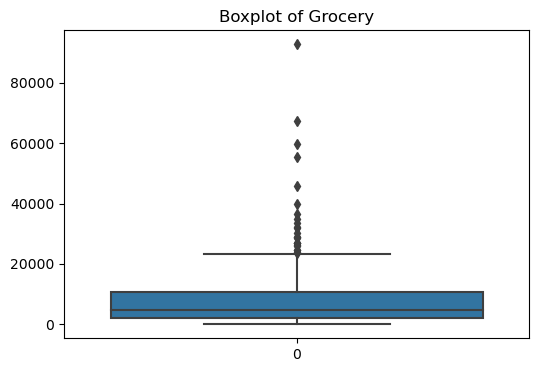

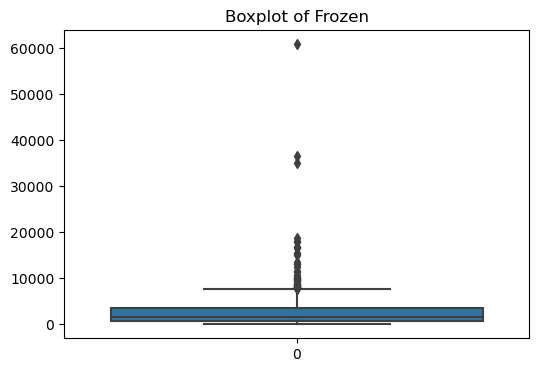

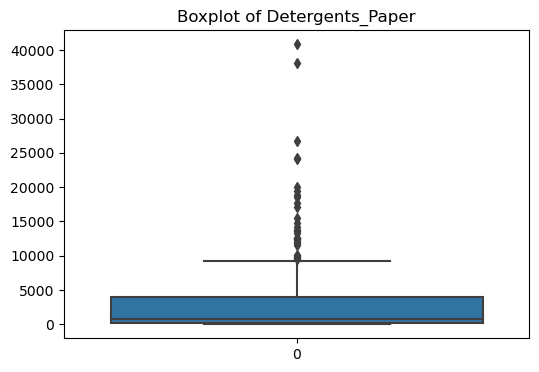

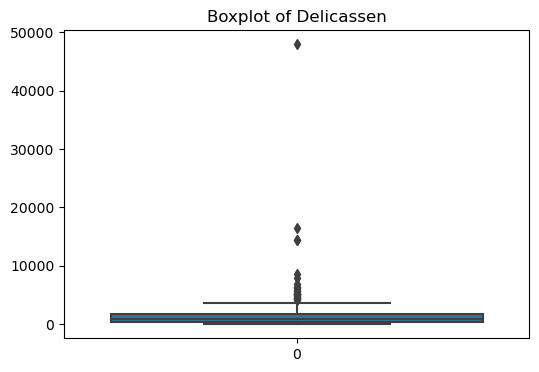

Number of outliers in Channel: 0
Number of outliers in Region: 0
Number of outliers in Fresh: 20
Number of outliers in Milk: 28
Number of outliers in Grocery: 24
Number of outliers in Frozen: 43
Number of outliers in Detergents_Paper: 30
Number of outliers in Delicassen: 27


In [17]:
# checking for outliers
# Draw boxplots for all features
for column in wholesale_df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(wholesale_df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Function to detect outliers
def detect_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = dataframe[(dataframe[column] < Q1 - 1.5*IQR) | (dataframe[column] > Q3 + 1.5*IQR)]
    return outliers

# Detect and print number of outliers for each feature
for column in wholesale_df.columns:
    outliers = detect_outliers(wholesale_df, column)
    print(f'Number of outliers in {column}: {len(outliers)}')

Highest number of outliers in frozen food and lowest number in channel and region because 'Channel' represents the hotel, cafe or retail store and 'Region' represents the customer region 

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [19]:
#columns are isolated for further analysis, such as clustering or dimensionality reduction using techniques like PCA.
selected_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = wholesale_df[selected_features]
print(X)

     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0    12669   9656     7561     214              2674        1338
1     7057   9810     9568    1762              3293        1776
2     6353   8808     7684    2405              3516        7844
3    13265   1196     4221    6404               507        1788
4    22615   5410     7198    3915              1777        5185
..     ...    ...      ...     ...               ...         ...
435  29703  12051    16027   13135               182        2204
436  39228   1431      764    4510                93        2346
437  14531  15488    30243     437             14841        1867
438  10290   1981     2232    1038               168        2125
439   2787   1698     2510      65               477          52

[440 rows x 6 columns]


In [20]:
#in this step standardization is an important preprocessing step because it ensures that each feature contributes equally to the analysis, especially when features are measured in different units or have different scales.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.05293319  0.52356777 -0.04111489 -0.58936716 -0.04356873 -0.06633906]
 [-0.39130197  0.54445767  0.17031835 -0.27013618  0.08640684  0.08915105]
 [-0.44702926  0.40853771 -0.0281571  -0.13753572  0.13323164  2.24329255]
 ...
 [ 0.20032554  1.31467078  2.34838631 -0.54337975  2.51121768  0.12145607]
 [-0.13538389 -0.51753572 -0.60251388 -0.41944059 -0.56977032  0.21304614]
 [-0.72930698 -0.5559243  -0.57322717 -0.62009417 -0.50488752 -0.52286938]]


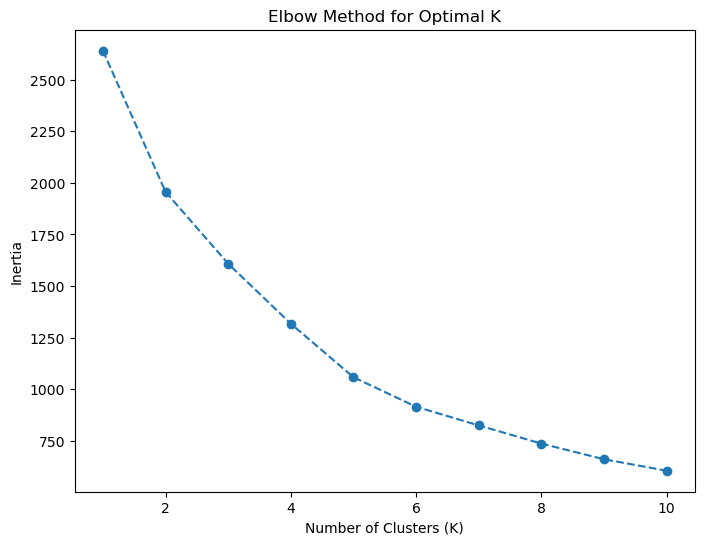

In [21]:
# Determine the optimal number of clusters (K)
# Use the Elbow Method to find the best K value
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [22]:
# Initialize K-means clustering with the chosen K
chosen_k = 3  # Replace with your chosen K
kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init= 10)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [23]:

# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to your dataset
wholesale_df['Cluster'] = cluster_labels

# Visualize the clusters using Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

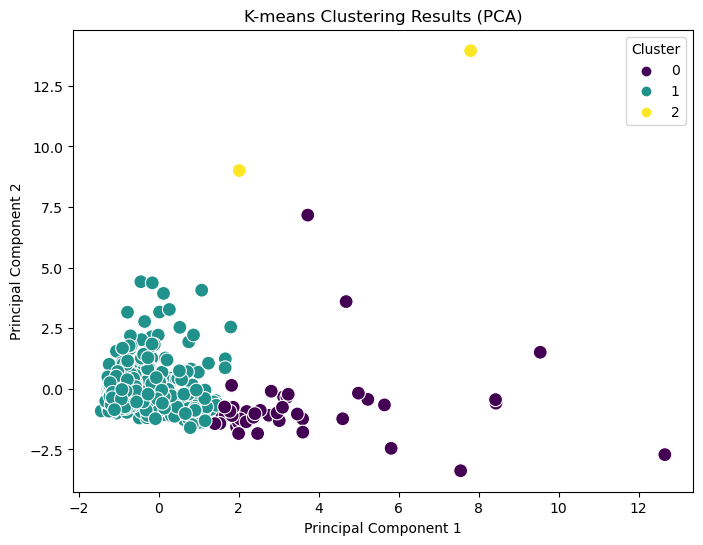

In [26]:
# Create a scatter plot of the clusters in the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Results (PCA)')
plt.legend(title='Cluster')
plt.show()

In [60]:
# Analyze and interpret the clusters
cluster_summary = wholesale_df.groupby('Cluster')[selected_features].mean()
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
                Fresh          Milk       Grocery        Frozen  \
Cluster                                                           
0        10440.933333  19386.422222  28656.088889   2190.244444   
1        12062.913486   4115.099237   5534.966921   2940.676845   
2        34782.000000  30367.000000  16898.000000  48701.500000   

         Detergents_Paper    Delicassen  
Cluster                                  
0            13327.800000   2374.200000  
1             1696.170483   1299.114504  
2              755.500000  26776.000000  


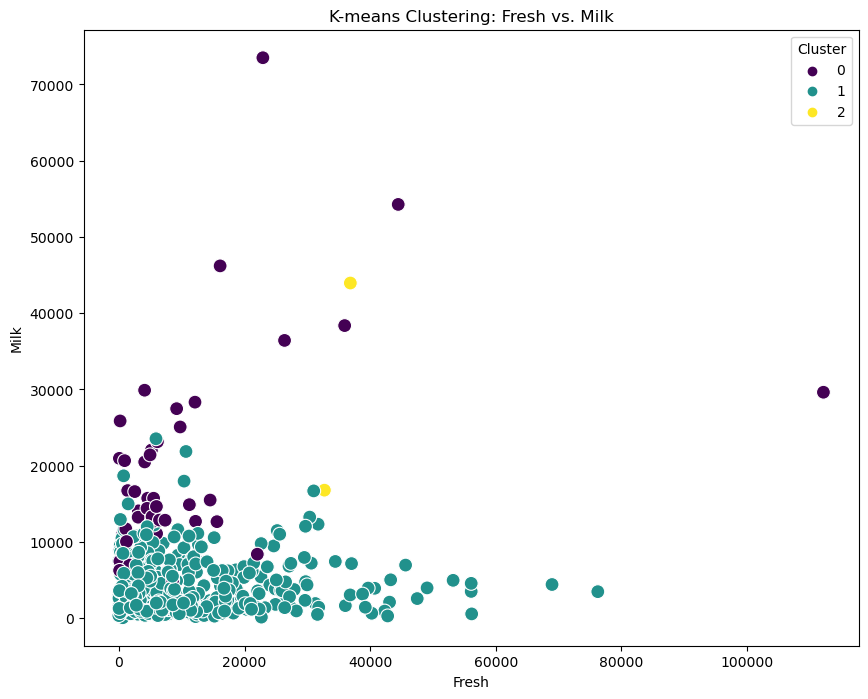

In [62]:
# You can further analyze and interpret the clusters based on their attribute means

# Optionally, you can visualize the original data points in the clusters
# For example, visualize the 'Fresh' vs. 'Milk' for each cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(data=wholesale_df, x='Fresh', y='Milk', hue='Cluster', palette='viridis', s=100)
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('K-means Clustering: Fresh vs. Milk')
plt.legend(title='Cluster')
plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [5]:
# Standardization: Standardize the features for hierarchical clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

NameError: name 'X' is not defined

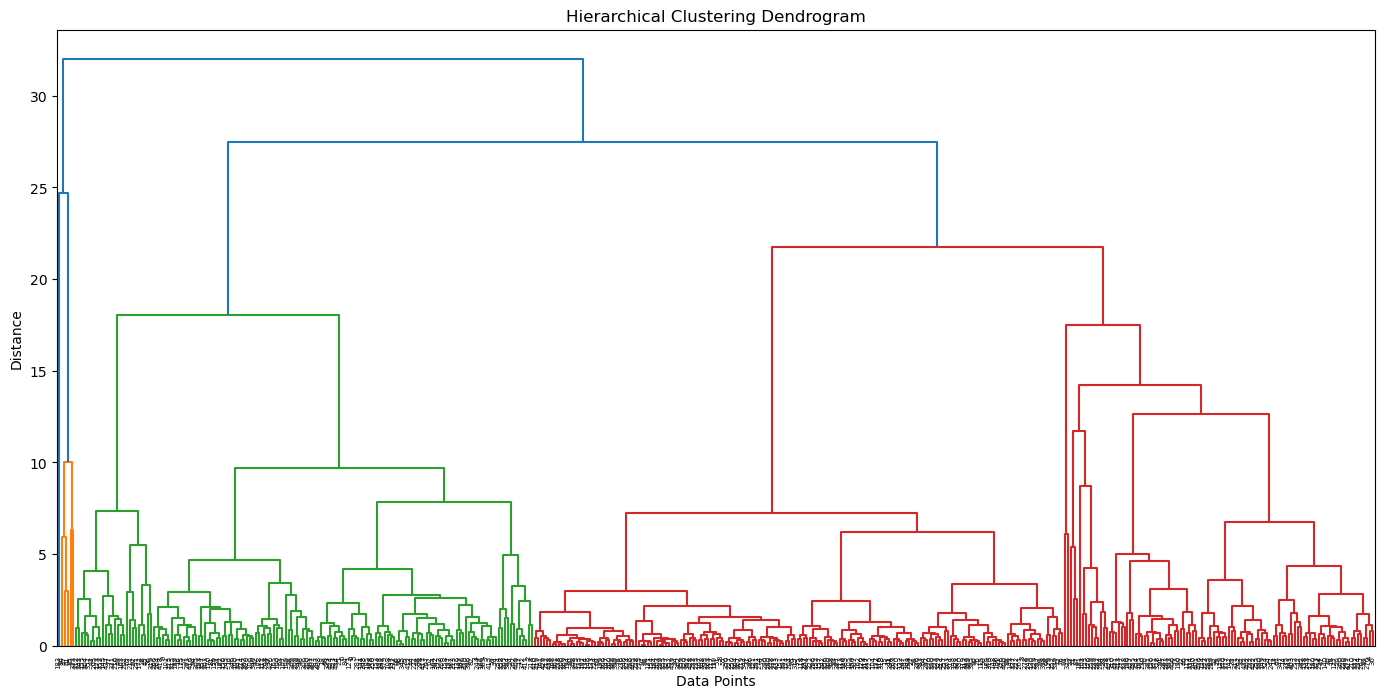

In [89]:
# Perform hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward', metric='euclidean')

# Plot the dendrogram to determine the optimal number of clusters
plt.figure(figsize=(17, 8))
dendrogram(linkage_matrix, p=30, truncate_mode='level', orientation='top', labels=wholesale_df.index)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [3]:
# Analyze the dendrogram to determine the optimal number of clusters
# Look for the largest vertical line that can be drawn without crossing any horizontal lines
# This line represents a reasonable number of clusters to choose (e.g., based on the "elbow" of the dendrogram)

# Based on the dendrogram analysis, choose an appropriate number of clusters
# You can visually estimate the number of clusters based on the dendrogram or use other techniques

# Perform hierarchical clustering again with the chosen number of clusters
chosen_num_clusters = 3

agg_cluster = AgglomerativeClustering(n_clusters=chosen_num_clusters, linkage='ward')
agg_cluster.fit(X_scaled)


NameError: name 'AgglomerativeClustering' is not defined

In [2]:
# Add the cluster labels to your dataset
wholesale_df['Cluster'] = agg_cluster.labels_

# Analyze and interpret the clusters
cluster_summary = wholesale_df.groupby('Cluster')[selected_features].mean()
print("Cluster Summary:")
print(cluster_summary)

# Optionally, you can visualize the original data points in the clusters
# For example, visualize the 'Fresh' vs. 'Milk' for each cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(data=wholesale_df, x='Fresh', y='Milk', hue='Cluster', palette='viridis', s=100)
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Hierarchical Clustering: Fresh vs. Milk')
plt.legend(title='Cluster')
plt.show()

NameError: name 'agg_cluster' is not defined

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

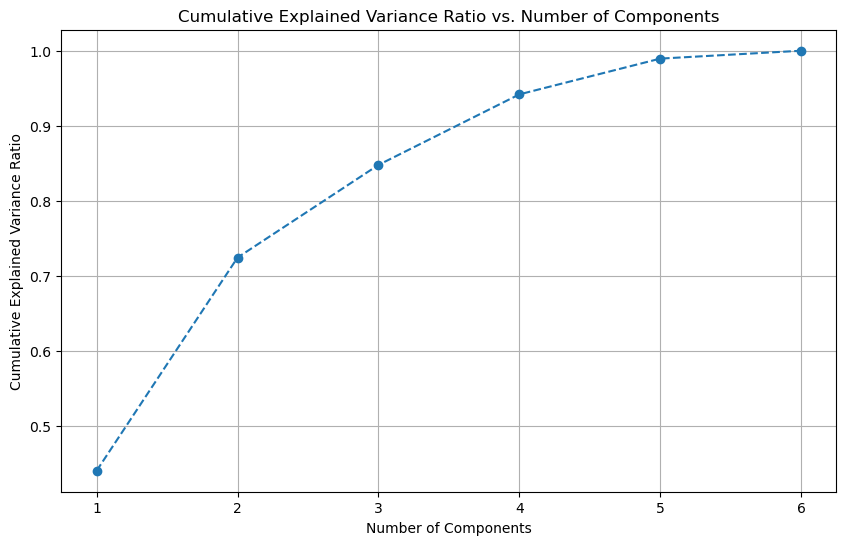

In [92]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Plot the explained variance ratio to decide on the number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid()
plt.show()

In [93]:
# Analyze the explained variance ratio plot to choose the number of components
# Select the number of components that captures a sufficient amount of variance, often around 95% or more.

# Once you've chosen the number of components, you can perform PCA again with the selected number
chosen_num_components = 2  # Replace with your chosen number of components

pca = PCA(n_components=chosen_num_components)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, chosen_num_components + 1)])

# Analyze and interpret the PCA components and loadings
component_loadings = pca.components_.T
loadings_df = pd.DataFrame(data=component_loadings, columns=[f'PC{i}' for i in range(1, chosen_num_components + 1)], index=selected_features)

# Print the loadings to see which original features contribute the most to each component
print("Principal Component Loadings:")
print(loadings_df)

Principal Component Loadings:
                       PC1       PC2
Fresh             0.042884  0.527932
Milk              0.545118  0.083168
Grocery           0.579256 -0.146088
Frozen            0.051189  0.611278
Detergents_Paper  0.548640 -0.255233
Delicassen        0.248682  0.504207


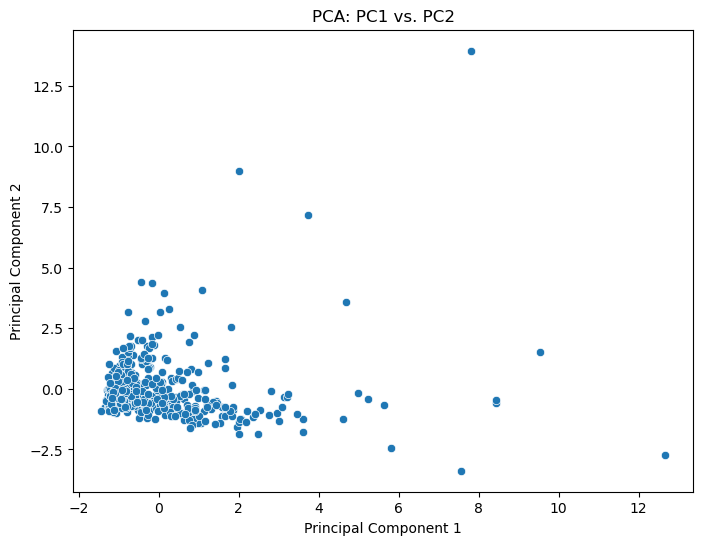

In [94]:
# Optionally, you can visualize the data in the reduced-dimensional space
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: PC1 vs. PC2')
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

Customer Segmentation:

Through K-means clustering and hierarchical clustering, we identified distinct customer segments within the dataset. These segments represent groups of customers with similar purchasing behaviors based on attributes like fresh, milk, grocery, frozen, detergents_paper, and delicatessen.
Optimal Number of Clusters:

The Elbow Method and dendrogram analysis were used to determine the optimal number of clusters. For both K-means and hierarchical clustering, an appropriate number of clusters (e.g., 3 or 4) was selected to represent the data effectively.
Principal Component Analysis (PCA):

PCA was applied to reduce the dimensionality of the dataset and discover underlying patterns. We found that a subset of principal components effectively captures the variance in the data, allowing for more concise representation and interpretation.
Feature Importance:

Through PCA loadings analysis, we determined which original features contribute the most to each principal component. This insight helps us understand the key factors influencing customer purchasing behavior, such as whether certain products are often purchased together or independently.